In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import nltk
import numpy as np

from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

from text_recognizer.data.emnist_lines import EMNISTLines, construct_image_from_string, get_samples_by_char
from text_recognizer.data.sentence_generator import SentenceGenerator

In [2]:
sentence_generator = SentenceGenerator()
for _ in range(4):
    print(sentence_generator.generate(max_length=16))

[nltk_data] Downloading package brown to /mnt/g/ubuntu/Projects/Text-
[nltk_data]     Recognizer/data/downloaded/nltk...
[nltk_data]   Unzipping corpora/brown.zip.


for any snakes
are those
just come
into operation


In [3]:
import argparse
args=argparse.Namespace(max_length=16,max_overlap=0)
dataset=EMNISTLines(args)
dataset.prepare_data()
dataset.setup()
print(dataset)
print("Mapping:", dataset.mapping)

EMNISTLinesDataset generating data for train...
EMNISTLinesDataset generating data for val...


/home/user/miniconda3/envs/bcp_new/lib/python3.7/site-packages/pytorch_lightning/core/datamodule.py:424: LightningDeprecationWarning: DataModule.prepare_data has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.prepare_data.
  f"DataModule.{name} has already been called, so it will not be called again. "
/home/user/miniconda3/envs/bcp_new/lib/python3.7/site-packages/pytorch_lightning/core/datamodule.py:424: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  f"DataModule.{name} has already been called, so it will not be called again. "


EMNISTLinesDataset generating data for test...
EMNISTLinesDataset loading data from HDF5...
EMNIST Lines Dataset
Min overlap: 0
Max overlap: 0
Num classes: 83
Dims: (1, 28, 448)
Output dims: (16, 1)
Train/val/test sizes: 10000, 2000, 2000
Batch x stats: (torch.Size([128, 1, 28, 448]), torch.float32, tensor(0.), tensor(0.0777), tensor(0.2377), tensor(1.))
Batch y stats: (torch.Size([128, 16]), torch.int64, tensor(3), tensor(66))

Mapping: ['<B>', '<S>', '<E>', '<P>', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', '!', '"', '#', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '?']


In [4]:
def convert_y_label_to_string(y,dataset=dataset):
    return "".join([dataset.mapping[i] for i in y])

y_example=dataset.data_train[0][1]
print(y_example,y_example.shape)
convert_y_label_to_string(y_example)

[55 47 40 58 44 66 54 45  3  3  3  3  3  3  3  3] (16,)


'phase of<P><P><P><P><P><P><P><P>'

phase of<P><P><P><P><P><P><P><P>
jobs Each of<P><P><P><P>
New<P><P><P><P><P><P><P><P><P><P><P><P><P>
the<P><P><P><P><P><P><P><P><P><P><P><P><P>
Tribal<P><P><P><P><P><P><P><P><P><P>
in<P><P><P><P><P><P><P><P><P><P><P><P><P><P>
fatal<P><P><P><P><P><P><P><P><P><P><P>
a complete<P><P><P><P><P><P>
resolutely at<P><P><P>


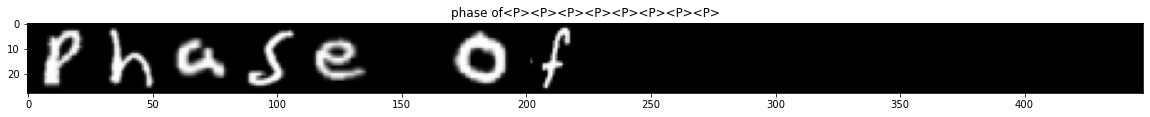

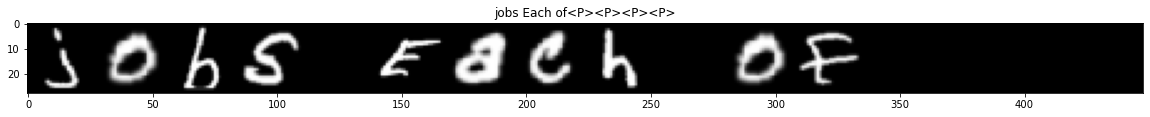

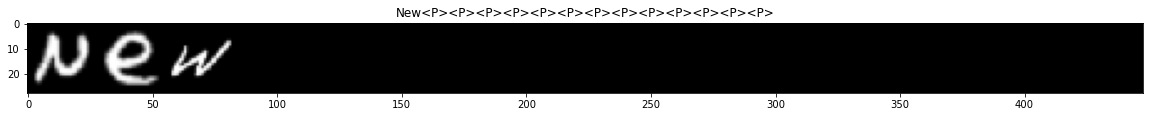

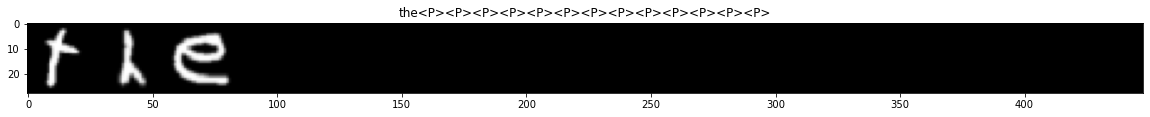

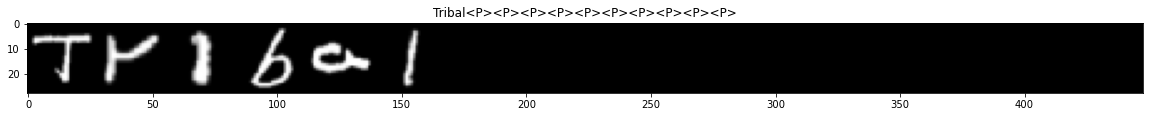

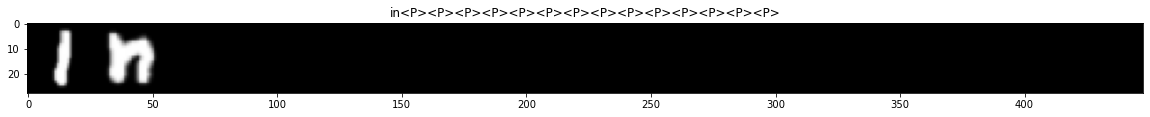

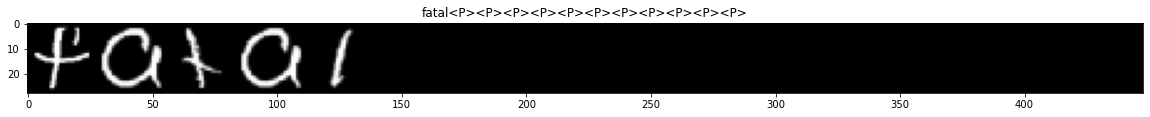

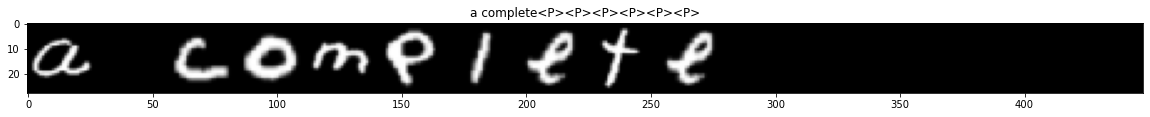

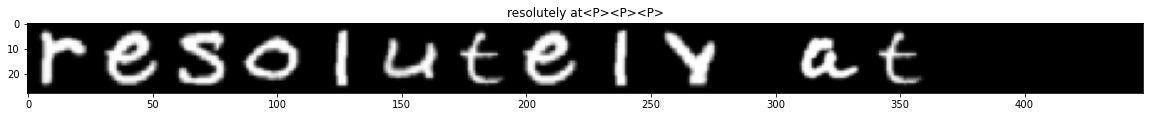

In [5]:
num_samples_to_plot=9

for i in range(num_samples_to_plot):
    plt.figure(figsize=(20,20))
    x,y=dataset.data_train[i]
    sentence=convert_y_label_to_string(y)
    print(sentence)
    plt.title(sentence)
    plt.imshow(x.squeeze(),cmap="gray")

In [6]:
args=argparse.Namespace(max_length=34,max_overlap=0.33)
dataset=EMNISTLines(args)
dataset.prepare_data()
dataset.setup()
print(dataset)

EMNISTLinesDataset generating data for train...
EMNISTLinesDataset generating data for val...


/home/user/miniconda3/envs/bcp_new/lib/python3.7/site-packages/pytorch_lightning/core/datamodule.py:424: LightningDeprecationWarning: DataModule.prepare_data has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.prepare_data.
  f"DataModule.{name} has already been called, so it will not be called again. "
/home/user/miniconda3/envs/bcp_new/lib/python3.7/site-packages/pytorch_lightning/core/datamodule.py:424: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  f"DataModule.{name} has already been called, so it will not be called again. "


EMNISTLinesDataset generating data for test...
EMNISTLinesDataset loading data from HDF5...
EMNIST Lines Dataset
Min overlap: 0
Max overlap: 0.33
Num classes: 83
Dims: (1, 28, 952)
Output dims: (34, 1)
Train/val/test sizes: 10000, 2000, 2000
Batch x stats: (torch.Size([128, 1, 28, 952]), torch.float32, tensor(0.), tensor(0.0792), tensor(0.2397), tensor(1.))
Batch y stats: (torch.Size([128, 34]), torch.int64, tensor(3), tensor(66))



phase of Newark will<P><P><P><P><P><P><P><P><P><P><P><P><P><P>
the fire for washing<P><P><P><P><P><P><P><P><P><P><P><P><P><P>
go much further than<P><P><P><P><P><P><P><P><P><P><P><P><P><P>
up Dont<P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>
resolutely at<P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>
abrupt end<P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>
high ground<P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>
voyage The sickness was<P><P><P><P><P><P><P><P><P><P><P>
I said Its a kindness to<P><P><P><P><P><P><P><P><P><P>


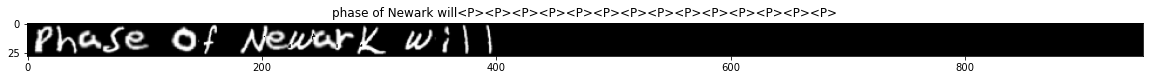

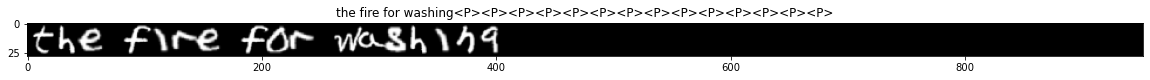

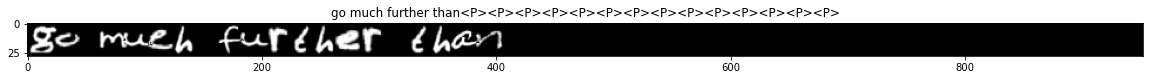

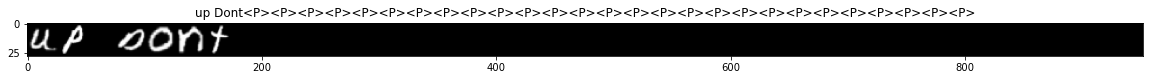

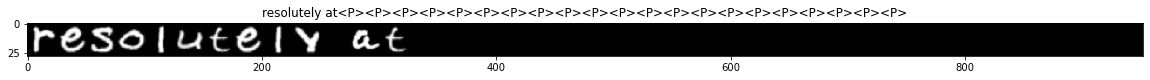

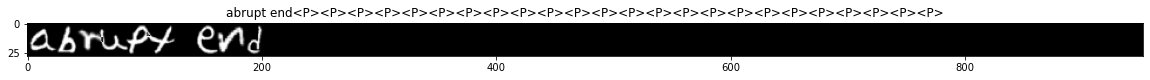

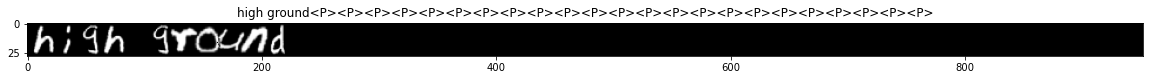

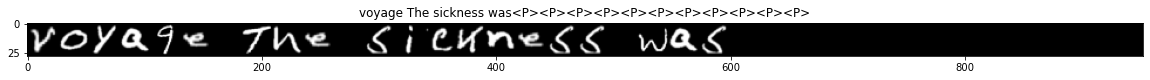

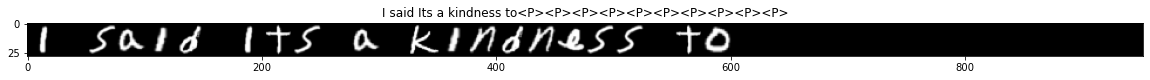

In [7]:
num_samples_to_plot=9

for i in range(num_samples_to_plot):
    plt.figure(figsize=(20,20))
    x,y=dataset.data_train[i]
    sentence=convert_y_label_to_string(y)
    print(sentence)
    plt.title(sentence)
    plt.imshow(x.squeeze(),cmap="gray")